# Chapter 14      
# Generating more samples; Resampling Methods

## Put your name below
Bill Henderson

## Introduction to Resampling   

There were others who had forced their way to the top from the lowest rung by the aid of their bootstraps.”   
James Joyce, ‘Ulysses’ 1922

Resampling methods are powerful and widely used in computational statistics. By repeatedly re-sampling data some of the assumptions of classical statistical methods can be relaxed. These computationally intensive methods are largely products of the computer age. Resampling methods provide a natural way to find uncertainty when performing statistical inferences.  

Resampling methods draw heavily on the central limit theorem (CLT) (Chapter 12) and the weak law of large numbers (Chapter 9). The weak law of large numbers tells us that a resampled estimate of a static converges to the correct value when certain conditions are met. The CLT tells us that the sampling distribution of mean estimates converges to a Normal distribution, as the number of resamples increases.   

There are a great many use cases for resampling methods. Specifically re-sampling methods:

- Estimate a probability distribution of a statistic.    
- Make minimal distributional assumptions, when compared to classical frequentist statistics.    
- Are computationally intensive, but often highly parallelizable.     

Commonly used re-sampling methods include:

- **Randomization or Permutation methods:** for hypothesis tests.    
- **Non-parametric bootstrap resampling:** to compute statistics.    
- **Jackknife:** or leave one out re-sampling to compute statistics.     
- **Cross-validation:** resample into multiple folds without replacement to assess the performance of statistical and machine learning models.     


### Randomization and permutation methods

Randomization and permutation methods were pioneered by Fisher as early as 1911. Fisher fully developed the theory in his 1935 book. The scalability of fully rank permutation methods remains limited, even with modern computers. But, modern methods using limited numbers of resamples have proved robust and scalable.

A null distribution is estimated by randomly permuting the response variable. The statistic is computed many times using a different permutation each time. This result represents a sampling distribution of a null model. A test statistic is then compared to a quantile of the null distribution to determine significance. 


### Jack knife methods

Jack knife methods are often effective when there are only limited data samples. Maurice Quenouille originally suggested this method in 1949. The jack knife was fully developed by John W. Tukey, who gave the method its name, in 1958. Tukey saw that method as a simple tool useful for many purposes like a pocket knife.   

The jack knife computes multiple values of a statistic by **leaving out one observation** each time. Therefore, for n observations, there are n estimates of the statistic. The expected value of the statistic is then the mean of the resampled estimates.  

Jack knife estimates often work surprisingly well for small samples. As a result of this and some other useful properties, jack knife methods are still in use today. 

### Cross-validation

Today, cross-validation is widely used in the testing of machine learning models. Cross-validation was originally proposed by Kurtz in 1948. Mosier extended the method to double cross-validation in 1951. The modern method of nested or multi-cross-validation was introduced by Krus and Fuller in 1982. 

At each resample, the cross-validation algorithm evaluates a model by dividing the cases into **k folds**. For the number of observations n, each fold contains n/k samples. The model parameters are estimated (model trained in machine learning terminology) using k-1 folds and then evaluated using the kth fold. This process is repeated k times. The average model performance and the variance of the performance metrics are then computed from the k cross-validation estimates.  

When $k = n$, cross-validation is a leave-one-out algorithm. In this case, cross-validation is similar to the jack knife algorithm.   

### Bootstrap 

The bootstrap is an extremely general and powerful re-sampling method. In principle, the bootstrap algorithm can provide estimates of the distributions of almost any statistic. The bootstrap method was first suggested by Efron and Hinkley in 1978 and further developed by Efron in 1979. A full treatment was provided in Efron's 1980 book. 

By repeatedly re-sampling the data, bootstrap methods relax some of the assumptions of classical statistical methods. For example, nonparametric bootstrap methods do not require any assumptions about a sampling distribution. In effect, bootstrap methods trade intensive computations for the mind power of the statistician.     

As with other re-sampling methods, the bootstrap algorithm is computationally intensive. However, with increased computing power, the use of bootstrap methods continues to expand. Further, the algorithm can be readily parallelized.  

The bootstrap algorithm is the focus of this chapter. 


## Pitfalls of Resampling Methods    

Re-sampling methods are general and powerful but, there is no magic involved! There are pitfalls one should be aware of! 

Resampled estimate of a statistic can be no better than the original sample of observations allows. If a sample is biased, the re-sampled statistic estimate based on that sample will be biased. As an example consider that the bootstrap estimate of the mean is an **unbiased sample estimate**, $\bar{x}$. But, there is no guarantee this estimate is unbiased with respect to the population parameter, $\mu$.  
   
The resampled variance and confidence intervals can be no better than the sample distribution allows. In fact, bootstrap CIs are known to be optimistically biased. Be suspicious if the confidence intervals you compute seem too good to be true!     

All resampling methods are computationally intensive. However, all of the commonly used methods are highly parallelizable. Thus, in 21st-century computing environments, resampling methods are quite scalable. But there are limits. Computing resamples statistics from very large data sets directly can be prohibitive.     

## Point Estimates vs. Distribution Estimates

The goal of **frequentist statistics** is to compute a **point estimate** of a statistic or parameter and **confidence interval** for the point estimate. By a point estimate, we mean a single most likely value. The confidence interval is based on the properties of some assumed sampling distribution.For example, for the difference in means, we estimate the confidence intervals by assuming a t-distribution for the sampling distribution.      

Bootstrap methods are firmly in this frequentist camp. The goal is to estimate the sampling distribution using bootstrap resamples, $\hat{\mathcal{F}}^*$, of the original sample, $\hat{\mathcal{F}}$. The statistic computed from each resample, $s(\hat{\mathcal{F}}^*)$. is assumed to arise from the sampling distribution.    

Rather than computing a point estimate directly, bootstrap methods compute a **bootstrap distribution** of the statistic. The bootstrap distribution is an approximation of the sampling distribution of the statistic. The concept of sampling the bootstrap distribution is shown in the figure below.  

<img src="../images/BootstrapDistribution.png" alt="Drawing" style="width: 800px;"/>

The bootstrap distribution is comprised of values of the statistic computed from **bootstrap samples** of the original data sample. Based on this distribution a most likely point estimate of the statistic, or **bootstrap estimate**, is computed as the mean of the bootstrap distribution. The **bootstrap confidence interval** is also computed from the bootstrap distribution. This approach is in contrast to the purely frequentist approach of computing point estimates and confidence intervals using an assumed sampling distribution. 

## Overview of the Nonparametric Bootstrap Algorithm

The nonparametric bootstrap algorithm is used to compute an estimate of the sampling distribution of most any statistic. The term **nonparametric** is applied in this case, since no assumptions about parametric sampling distributions are required. Instead, the resample estimates of the statistic are an approximation of the sampling distribution.   

### Bootstrap samples and the bootstrap distribution    

Rather than computing a point estimate directly, bootstrap methods compute a **bootstrap distribution** of a statistic. The bootstrap distribution is comprised of values of the statistic computed from bootstrap resamples of the original observations (data sample). Computing the nonparametric bootstrap distribution requires **no assumptions about population distribution!**.

The nonparametric **bootstrap estimate** of a statistic is mostly likely a point estimate of the statistic given the bootstrap distribution. As a consequence of the central limit theorem, the bootstrap estimate is the mean of the bootstrap distribution. We will address computing bootstrap confidence intervals shortly.    

### What is a nonparametric model?    

What distinguishes nonparametric statistical models from parametric models? Many familiar statistic models are **parametric**, being based on an assumed **likelihood model**. The likelihood model is based on a parametric distribution. For example, Normal likelihood has two familiar parameters which must be estimated for location and scale.   

In contrast, a **nonparametric model** is not based on a parametric likelihood. Instead, an **empirical distribution** is used. The empirical distribution is estimated from the observations alone. Statistical properties of the distribution of the observations, such as mean and variance, are estimated from this empirical distribution. Examples of nonparametric statistical estimators include permutation tests and jackknife estimates.  

It would seem that using a nonparametric model would have a significant advantage over a parametric model. It is true that a nonparametric model avoids the risk of a misspecified parametric likelihood model. In other words, a nonparametric model can be applied to observations generated from a process with almost any distribution. However, there is a significant cost for this flexibility. The inherent variance of any estimated statistic will be greater. For example, if a generating process is approximately Normal, the parametric estimate of location will have less variance than a nonparametric estimate. As a result of the higher variance of statistics estimated from nonparametric models, larger sample sizes are generally required. 

### The nonparametric bootstrap algorithm    

The nonparametric bootstrap method follows a simple algorithm. Estimates of the statistic are accumulated by these steps:     
1. **Randomly sample with replacement** (e.g. Bernoulli sample) N values from an original data sample of N values. That is, the re-sample is the same size as the original data sample. This resample is called a **bootstrap sample**.   
2. Re-compute the statistic with the current bootstrap sample. This is a **bootstrap estimate** of the statistic.    
3. Repeat steps 1 and 2 to accumulate the required number of bootstrap estimates of the statistic. The accumulated statistic values form the **bootstrap distribution**.   
4. The mean of the computed statistic values is the **bootstrap point estimate** of the statistic.     
For example, you can compute the bootstrap mean as:    

$$Meanboot = \frac{\Sigma_i mean(sample_i)}{nsample}$$
where, for example, given 10 data values, the ith bootstrap sample might be:
$$sample_i = X_1 + X_2 + X_3 + X_4 + X_5 + X_6 + X_7 + X_8 + X_1 + X_5$$

Notice two key points about the bootstrap sample which are results of random sampling with replacement:   
1. Some values from the original sample will not be included in a particular bootstrap sample.   
2. Some values from the original sample will occur multiple times in a particular bootstrap sample. 


This nonparametric bootstrap algorithm is illustrated in the figure. 

<img src="../images/BootstrapMean.png" alt="Drawing" style="width: 800px;"/>

## Example; one-sample bootstrap

Computing a bootstrap distribution of a mean estimate is one of the simplest examples of applying the nonparametric bootstrap algorithm. A bootstrap estimate of the mean is computed a number of times from a single original sample. The result is a bootstrap distribution of the mean. Since a single original sample is resampled, this method is known as the **one-sample bootstrap algorithm**. While we focus on the mean statistic in this example, it is important to realize that this algorithm is applicable to **most any one-sample statistic**.     

In this section, we will compute the bootstrap distribution and bootstrap mean estimates from student standardized math test scores. This data set is known as [HSB2](https://www.openintro.org/data/index.php?data=hsb2) and is a subset of a larger sample. The data were collected by the [National Center for Education Statistics](https://nces.ed.gov/).    

We start by examining the head of a data frame containing these data.  


In [92]:
from statistics import covariance

import pandas as pd
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels
import scipy.stats as ss
import seaborn as sns
from math import atanh, tanh

test_scores = pd.read_csv('../data/hsb2.csv', index_col=0)
test_scores.head()


,female,race,ses,schtyp,prog,read,write,math,science,socst
id,,,,,,,,,,
70,0,4,1,1,1,57,52,41,47,57
121,1,4,2,1,3,68,59,53,63,61
86,0,4,3,1,1,44,33,54,58,31
141,0,4,3,1,3,63,44,47,53,56
172,0,4,2,1,2,47,52,57,53,61


The first three columns show the student's sex, race, and socioeconomic status (SES). The next columns indicate the type of school (public or private) and the type of program the student is in (general, academic, vocational). The final columns contain the students' scores on standardized tests for five subjects.       

The code in the cell below displays a histogram with kernel density estimate of the math scores of all students in the sample.  


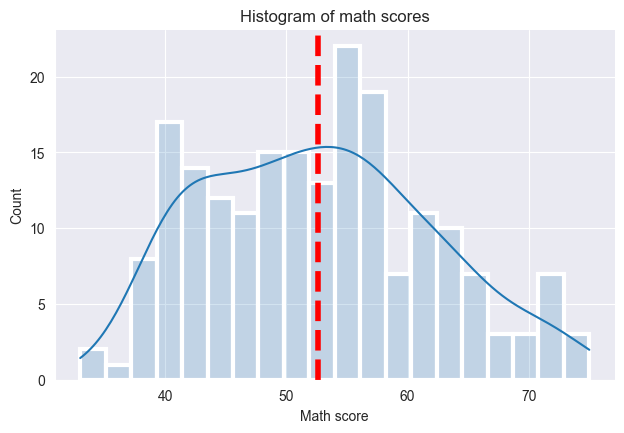

In [69]:
## Plot the histogram of the math scores
def plot_hist(x, xlab, title, bins=20, height=5):   
       sns.displot(x, bins=bins, kde=True, height=height, aspect=1.4, linewidth=3, alpha=0.2)
       plt.rcParams.update({'font.size': 10})
       plt.axvline(x=np.mean(x), color='red', linestyle='dashed', linewidth=4)
       plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.8)
       plt.xlabel(xlab)
       plt.title(title)

math = test_scores.loc[:,'math']
plot_hist(math, 'Math score', 'Histogram of math scores')
plt.show()


It is questionable if the distribution of math scores is Normally distributed. Fortunately, using bootstrap methods we do not need to concern ourselves with either the population or sampling distribution assumptions.   

The code below generates bootstrap and bootstrap mean estimates from those samples samples. These resamples are drawn with replacement from the math scores of all students using the [numpy.random.choice](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) function. The point estimate of the mean is printed and a histogram of the bootstrap distribution is then displayed.  


Bootstrap point estimate =  52.63


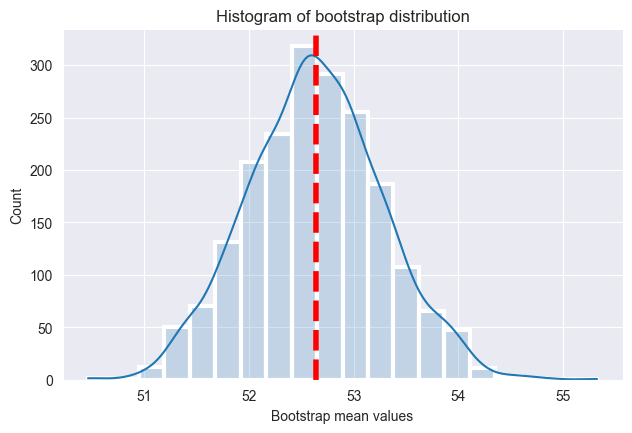

In [70]:
## Compute and plot the one-sample bootstrap distribution of the mean    
def bootstrap_statistic(x, b, statistic):
    n_samps = len(x)
    boot_vals = []
    for _ in range(b):
        boot_vals.append(statistic(nr.choice(x, size=n_samps, replace=True)))
    boot_estimate = np.mean(boot_vals)
    print('Bootstrap point estimate = {:6.2f}'.format(boot_estimate))
    return(boot_estimate, np.array(boot_vals))      
    
bootstrap_mean_estimate, boot_means = bootstrap_statistic(math, 2000, np.mean)

plot_hist(boot_means, 'Bootstrap mean values', 'Histogram of bootstrap distribution')

You can see that the bootstrap distribution of the mean estimate is close to Normally distributed. This is a result of the CLT. 

You may well wonder how many bootstrap samples should you use to estimate the bootstrap distribution. Efron and Tibshirani (1993) and Efron and Hasti (2016) recommend using at least 200 bootstrap samples for point estimates. More recent work by several authors, including Chihara and Hesterberg (2018) indicates that more samples are desirable. With modern computers using 2,000, or more, samples are considered good practice.   

> **Exercise 14-1:** In order to verify that the bootstrap distribution of the mean estimate for the math scores is nearly Normally distributed, compute and display the quantile-quantile (QQ) Normal plot of the bootstrap mean estimates.  You can use the [statsmodels.graphics.gofplots.qqplot](https://www.statsmodels.org/stable/generated/statsmodels.graphics.gofplots.qqplot.html) function, with the `line=45` argument. 

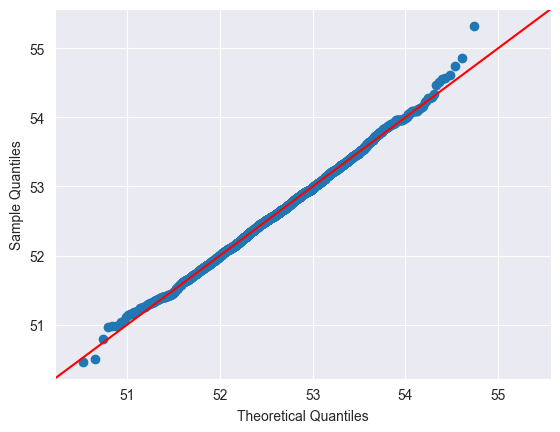

In [71]:
def plot_QQ(boot_samples):
    statsmodels.graphics.gofplots.qqplot(boot_samples, loc=np.mean(boot_samples), scale=np.std(boot_samples), line="45");

## Put your code below
plot_QQ(boot_means)


  > With the exception of a few outliers, does the bootstrap distribution appear Normally distributed?     

> **Answer:**  Yes, there's some slight variation at the extremes, but the points generally fall on the $45\degree$ line.       

> **Exercise 14-2:** As has been discussed, the one-sample bootstrap algorithm can be applied to almost any suitable statistic. Using 2000 resamples, compute the bootstrap point estimate of the variance of the aggregate math scores from the SBS2 dataset. Display the histogram and Q-Q plots of the bootstrap distribution. 

Bootstrap point estimate =  86.75


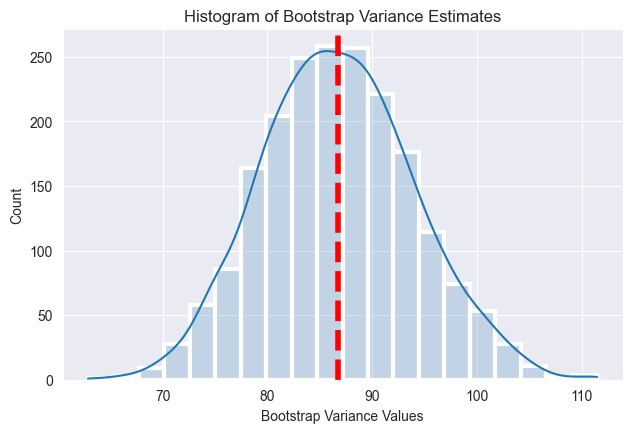

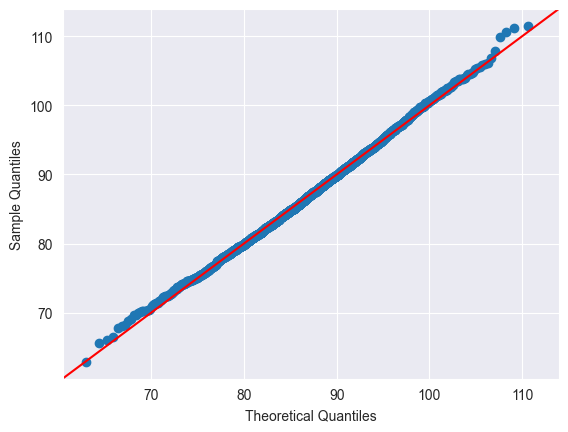

In [72]:
## Put your code below
# assuming the dataset intended was HBS2 like above. Question states SBS2
var_math_estimate, var_math_vals = bootstrap_statistic(math, 2000, np.var)
plot_hist(var_math_vals, 'Bootstrap Variance Values', 'Histogram of Bootstrap Variance Estimates' )
plot_QQ(var_math_vals)




> Theory tells us that the error in estimates of the variance should be $\chi^2$ distributed. Further, for large samples, or high degrees of freedom, and a mean far from 0, the $\chi^2$ distribution approaches the Normal. With these facts in mind, what statement can you make about the bootstrap distribution of the variance estimates and why?   

> **Answer:** The fact that the error estimates of variance is $\chi^2$ distributed makes good sense since as we add more samples, the error of the estimate should decrease like the $\chi^2$ distribution does as we have more information to better simulate the actual value we're estimating. Also, as we get more info, that estimate will more closely fall in a Normal distribution since the vast majority of the estimates will fall nearer to the true value. So the boostrap distribution should approach the Normal distribution since its error distribtion is also normalizing about a mean of zero as the sample size approaches the population value (larger proportion of the whole dataset). This of course introduces a trade-off of computation time/effort an allowable error.   



## Bootstrap Confidence Intervals   

Now that we can compute a bootstrap distribution the next step is to find the confidence intervals so that we can perform some statistical inference. Classical methods of computing the bounds of confidence intervals rely on assumptions of the sampling distribution. Whereas, nonparametric confidence intervals are free of these assumptions.        

The direct approach to computing nonparametric confidence intervals is known as the **percentile method**. In simple terms, the percentile method finds the bootstrap sample values at the $\alpha/2$ and $1-\alpha/2$ points of the bootstrap distribution. The percentile confidence interval algorithm is nicely simple and has a few steps:      
1. Define confidence level; for example, 95% or $\alpha=0.05$    
2. Order b bootstrap samples, $s_i$, by value   
3. Lower CI index; $i = b * \alpha/2$     
4. Upper CI index; $i = b * (1 - \alpha/2)$     
   
As has been noted already, the percentile algorithm is quite simple. However, the resulting confidence intervals are known to be biased! The bias is generally worse for statistics with asymmetric sampling distributions. Often, this bias results in overly optimistic confidence intervals. There are several well-known bias corrections that are typically applied to percentile method confidence intervals. For now, we will just say that one should be highly suspicious of confidence intervals that seem too good to be true!        

In the preceding section, we computed and displayed the nonparametric bootstrap estimates of the mean of the student's math scores. Now, we will extend this analysis to include estimates of the confidence intervals. The code shown below uses the basic percentile method to compute confidence intervals. Execute the code and examine the results.    

Bootstrap point estimate =  52.65
At alpha = 0.05, lower and upper bootstrap confidence intervals =  51.38    53.98


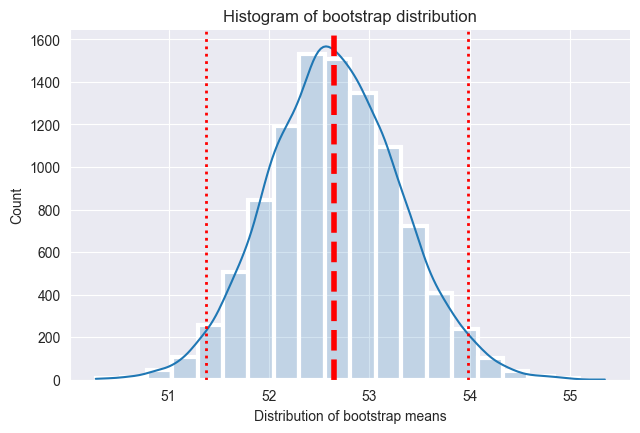

In [73]:
## Compute and plot the one-sample bootstrap of means with confidence intervals
def bootstrap_cis(boot_samples, alpha=0.05):
    n = len(boot_samples)
    sorted = np.sort(boot_samples)
    index_lci = int(n * alpha / 2)
    index_uci = int(n * (1 - alpha / 2))
    print('At alpha = {0:3.2f}, lower and upper bootstrap confidence intervals = {1:6.2f}   {2:6.2f}'.format(alpha, sorted[index_lci], sorted[index_uci]))
    return(sorted[index_lci], sorted[index_uci])

def plot_hist_CI(boot_means, xlable='Distribution of bootstrap means'):
    LCI, UCI = bootstrap_cis(boot_means)
    plot_hist(boot_means, xlable, 'Histogram of bootstrap distribution')
    plt.axvline(x=LCI, color='red', linestyle='dotted', linewidth=2)
    plt.axvline(x=UCI, color='red', linestyle='dotted', linewidth=2)
    
bootstrap_mean_estimate, boot_means = bootstrap_statistic(math, 10000, np.mean)
plot_hist_CI(boot_means)

Now we have an idea of how much variation or uncertainty we can expect for the mean estimate of the student's math scores.    

As with the bootstrap point estimates, there is a question of how many bootstrap samples should you use to estimate the bootstrap confidence intervals. Since confidence intervals are estimated in the tails of the bootstrap distribution, more samples than the case of point estimates should be used. Efron and Tibshirani (1993) and Efron and Hasti (2016) recommend using at least 2,000 bootstrap samples for confidence interval estimates. More recent work by several authors, including Chihara and Hesterberg (2018) indicates that more samples are desirable. With modern computers using 10,000 or more samples is considered good practice.     

> **Exercise 14-3:** In exercise 14-2, you computed the bootstrap distribution and point estimate of the variance of the student math scores using 2000 bootstrap resamples. Now you will compute and print the 95% confidence intervals of the bootstrap distribution of the variance using 10000 bootstrap resamples. Plot the histogram of the bootstrap distribution with vertical lines showing the point estimate and the confidence interval. 

Bootstrap point estimate =  86.92
At alpha = 0.05, lower and upper bootstrap confidence intervals =  73.30   101.39


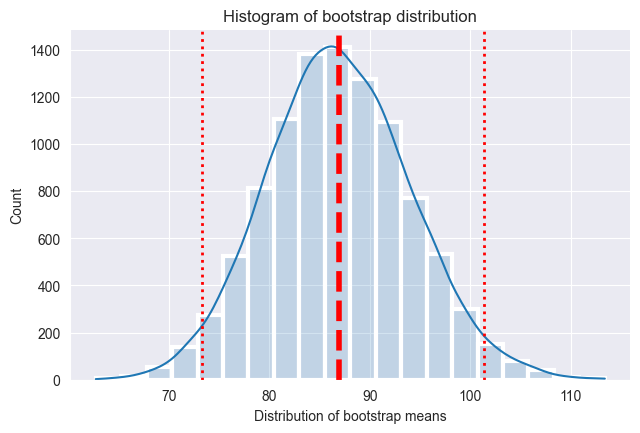

In [74]:
## Put your code below
bootstrap_var_estimate, boot_vars = bootstrap_statistic(math, 10000, np.var)
plot_hist_CI(boot_vars)


   >  What do these statistics tell you about how confident you can be about the estimate of the variance?   

> **Answer:** Our computation shows that the estimated variance of scores is 86.96 and there's a 5% chance that the true variance of the dataset falls below 73.36 or above 101.07.  

> **Exercise 14-4:** As discussed, the bootstrap distribution is an estimate of the sampling distribution of a statistic. The bootstrap confidence intervals should not change with the number of resamples, except for a small variation in error. To demonstrate this idea compute bootstrap distributions of the mean estimate of the student math scores using 500, 2000, 5000, 10000, and 50000 resamples. Compute and print the 95% confidence intervals for each of these bootstrap distributions. 

In [75]:
nr.seed(3425)
alpha = 0.05
## Put your code below
for samples in [500, 2000, 5000, 10000, 50000]:
    print(f"For {samples} samples")
    bootstrap_cis(bootstrap_statistic(math, samples, np.mean)[1])
    print()



For 500 samples
Bootstrap point estimate =  52.69
At alpha = 0.05, lower and upper bootstrap confidence intervals =  51.46    53.99

For 2000 samples
Bootstrap point estimate =  52.64
At alpha = 0.05, lower and upper bootstrap confidence intervals =  51.38    53.87

For 5000 samples
Bootstrap point estimate =  52.65
At alpha = 0.05, lower and upper bootstrap confidence intervals =  51.40    53.95

For 10000 samples
Bootstrap point estimate =  52.64
At alpha = 0.05, lower and upper bootstrap confidence intervals =  51.35    53.95

For 50000 samples
Bootstrap point estimate =  52.64
At alpha = 0.05, lower and upper bootstrap confidence intervals =  51.34    53.95



> Is there any substantial or systematic change in the confidence intervals and if so, what is this change? 

> **Answer:**  There appears to be very little variation in the confidence intervals, only changing by about four hundredths on average. If anything they may be stabilizing on a better estimate as the sampling increases.  

## Correlation coefficient as a two-sample estimate    

Do one-sample bootstrap methods only apply to statistics using a single variable? Not at all! An example is the correlation coefficient. 

Correlation coefficients measure the dependency of one variable on another. But, correlation coefficients are computed from a one-sample, in the form of pairs of values of random variables. Consider several of the many possible formulations of the [Pearson's correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient):   

\begin{align}
\rho_{\mathbf{X},\mathbf{Y}} &= \frac{\sum_i (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_i (x_i - \bar{x})^2(y_i - \bar{y})^2}}\\ 
&= \frac{\sum_i (x_i - \bar{x})(y_i - \bar{y})}{\sigma_x \sigma_y} \\ 
&= \frac{\mathbf{E}[(x_i - \bar{x})(y_i - \bar{y})]}{\sigma_x \sigma_y} = \frac{cov}{\sigma_x \sigma_y}
\end{align}

Computation of the correlation coefficient between two random variables, $\mathbf{X}$ and $\mathbf{Y}$, is performed using matched pairs of samples, $x_i$ and $y_i$. These are not random samples from each variable. They are sampled as a single related pair; that is, a one-sample is used.   

As a result of the foregoing, the nonparametric bootstrap distribution of correlations coefficients is computed by bootstrap resampling the pair of variables, $\mathbf{X}$ and $\mathbf{Y}$. In other words, a single bootstrap resample drawing related values. Notice that the sample nonparametric bootstrap can be applied to any of the commonly used correlation coefficients, not just Pearson's.     

> **Exercise 14-5:** In a previous section, we have discussed how the one-sample nonparametric bootstrap algorithm can be applied to Pearson's correlation coefficients. Now you will compute the bootstrap distribution of the correlation between the students' math and science scores using 2,000 resamples. When creating your bootstrap sample make sure you pair math and science values from the same student to create the single bootstrap sample.
>
> 
> The sampling distribution of the correlation coefficient is limited to the range $-1 \le \rho_{\mathbf{X},\mathbf{Y}} \le 1$. These bounds can lead to a biased sampling distribution. Fisher proposed a simple transformation to avoid this problem when computing confidence intervals of Pearson's correlation coefficients: 
$$F(\rho_{\mathbf{X},\mathbf{Y}}) = arctanh(\rho_{\mathbf{X},\mathbf{Y}})$$
> You should apply the FIsher's transformation to your bootstrap estimates of the correlation coefficients used to form the bootstrap distribution.    
>
> Once you have computed the bootstrap distribution, compute and print the mean and 95% confidence intervals of the correlation between the math and science score variables. Next, plot the histogram including vertical lines for the mean and confidence interval bounds.       
> 
> There is one last difficulty to contend with. The bootstrap estimates are in the arc hyperbolic tangent transformed space, and not in the usual space. As a result, the values computed are not comparable to other methods for finding correlation coefficients and the CIs. This problem is easily addressed by taking the hyperbolic tanget of the bootstrap mean and the CI to invert the transformation. Create code to print the hypterbolic tanget of the bootstrap mean and CIs. You can use the Python math.tanh function. Make sure you clearly label these values.    
>
> *Hint:* You should round the printed numeric variables to 2 or 3 digits to create clearer displays.     

In [98]:
## Put your code below
samples = 2000
students = test_scores.loc[:,['math','science']]
def bootstrap_two_samp_correlation_coeff(x: pd.DataFrame, b):
    n_samps = len(x)
    boot_vals = []
    for _ in range(b):
        sample_indexes = nr.choice(x.index, size=n_samps, replace=True)-1
        sample_values = x.iloc[sample_indexes]
        col = sample_values.columns
        cor_coeff = ss.pearsonr(sample_values[col[0]], sample_values[col[1]]).statistic
        if cor_coeff == 0:
            boot_vals.append(0)
        else:
            boot_vals.append(atanh(cor_coeff))
    boot_estimate = np.mean(boot_vals)
    print('Bootstrap point estimate transform and post transform = {:6.2f} {:6.2f}'.format(boot_estimate, tanh(boot_estimate)))
    return boot_estimate, np.array(boot_vals)
boot_cov_estimate, boot_vals = bootstrap_two_samp_correlation_coeff(students, 2000)
raw_cis_low, raw_cis_high = bootstrap_cis(boot_vals)
print(f"Actual Confidence interval post transform is: {tanh(raw_cis_low):6.2f} to {tanh(raw_cis_high):6.2f}")

Bootstrap point estimate transform and post transform =   0.74   0.63
At alpha = 0.05, lower and upper bootstrap confidence intervals =   0.60     0.89
Actual Confidence interval post transform is:   0.54 to   0.71


>  Answer the following questions:   
> 1. Is there a noticable difference between the bootstrap mean and CIs and the hyperbolic tangent transformed values.  
> 2. Does it appear that there is a statistically significant positive correlation between these two variables given the confidence intervals? 
> 3. Would you say that this correlation is relatively weak or strong and why?  

> **Answers:**     
> 1. It's not a huge difference, but given the range of values, it's significant.     
> 2. With the derived confidence interval, it would appear there is significant positive correlation between the two test scores.          
> 3. I would say the correlation is relatively strong because the range of values is -1 to 1, and we're looking at a likely value between 0.54 and 0.71 with our point estimate at 0.63.

## Two-sample Bootstrap    

In the preceding, we have worked only with one-sample statistics. How can we apply the bootstrap algorithm for two-sample statistics? Two-sample statistics are used extensively for statistical inference. For example, we might want to perform inference on the difference of means of two independently sampled populations. Our null hypothesis is that there is no significant difference.    

In classical statistical theory the difference of means of approximately Normally distributed random variables is assumed to be t-distributed. This assumption leads to the well-known t family of hypothesis tests. Using nonparametric bootstrap resampling frees us of these assumptions. We can make inferences of the difference of means for non-normally distributed samples. Further, we can easily perform inferences on the differences in almost any statistic.     

The basic idea of computing nonparametric bootstrap distributions can be applied to two-sample statistics. In fact, it can be applied to multiple sample statistics. But, to do so one must carefully consider how the bootstrap samples are generated.   

Can we just sample the concatenation of the two samples? **No!** The problem is that we want the resample of each of the random variables to have the size of the respective original samples. If we resample in a naive way, there is no guarantee of having correct number of resamples for each random variable. This imbalance in the sizes of the resamples leads to significant biases. The solution is to **independently resample** the two random variables in order to correctly sample each of the populations.

### Algorithm for the two-sample bootstrap     

The two-sample nonparametric bootstrap algorithm ensures that the two random variables are independently resampled. This algorithm requires some extra steps. The two-sample statistic is itself computed using statistics of the two random variables. For example, to compute the difference of means, independent bootstrap mean estimates of each of the random variables are required.   

The basic two-sample nonparametric bootstrap algorithm can be described by these steps:    
1. Independently random sample (e.g. Bernoulli sample) n data with replacement from each original data sample ensuring the number of resamples for each random variable is the number of original samples for each population.     
2. Compute the statistic (e.g. the means) for the two resamples.   
3. Compute the two-sample statistic; e.g. difference of means.    
4. Repeat steps 1, 2, and 3 to accumulate the required number of bootstrap samples
of the bootstrap distribution.    
5. The mean of the bootstrap distribution values is the bootstrap point estimate of the statistic.      
6. Compute CIs from bootstrap distribution.
   
Once the two-sample bootstrap distribution and confidence intervals have been computed, we can perform statistical inference. Typically, the inference involves determining if one can reject a null hypothesis given the bounds on the confidence interval. For example, if we are interested in the difference of means, the null hypothesis is that the difference is not significant with the confidence specified. However, if the confidence bounds of the statistic do not include zero we can say the difference is significant and reject the null hypothesis. In other words, we can reject the null hypothesis if the sign of the confidence bounds are the same; indicating the confidence interval is above or below zero. 

## Example of the two-sample bootstrap   

Let's consider a simple example of two-sample nonparametric bootstrap inference. In this case, we will determine if there is a significant difference in the mean math scores of the students drawn from the populations with low and mid socioeconomic status. Our null hypothesis is that there is no significant difference. We can perform this inference confidently, despite the fact that the students' math scores do not appear to be Normally distributed.    

For this example we will investigate the statistical significance of differences in math score between students of different Socioeconomic status (SES). To begin this investigation we start by showing a facet plot of the math score histogramss by SES along with the mean value of the strata. Execute the code in the cell below to display these results.      

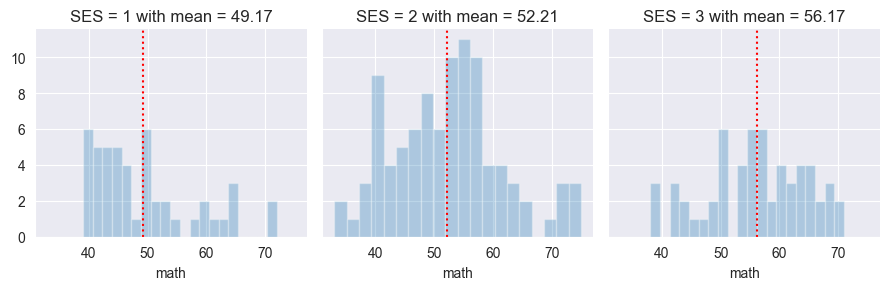

In [18]:
g = sns.FacetGrid(test_scores, col='ses', height=3)
g = g.map(plt.hist, "math", bins =20, alpha=0.3)

means = [round(test_scores.loc[test_scores['ses'] == ses, 'math'].mean(), 2) for ses in test_scores['ses'].unique()]
for ses, (ax, mean) in enumerate(zip(g.axes.flat, means)):
    ax.axvline(x=mean, color='r', linestyle=':')
    ax.set_title('SES = ' + str(ses+1) + ' with mean = ' + str(mean), )

One can see that differences in the distributions and the mean values. It is possible these differences arrise by sampling of the population alone. 

The next step is to determine if these differences are statistically significant. The code example below applies the two-sample nonparametric algorithm to the difference in means of the math scores of the low and mid-socioeconomic status students. There are a few important points to notice about this code:    
- The number of resamples is equal to the original sample size for each of the random variables.  
- The mean statistic of each of the resampled random variables is computed independently and the difference in the mean statistic is computed from these results.     
Execute the code. 

Bootstrap point estimate =  -3.00
At alpha = 0.05, lower and upper bootstrap confidence intervals =  -6.01     0.16


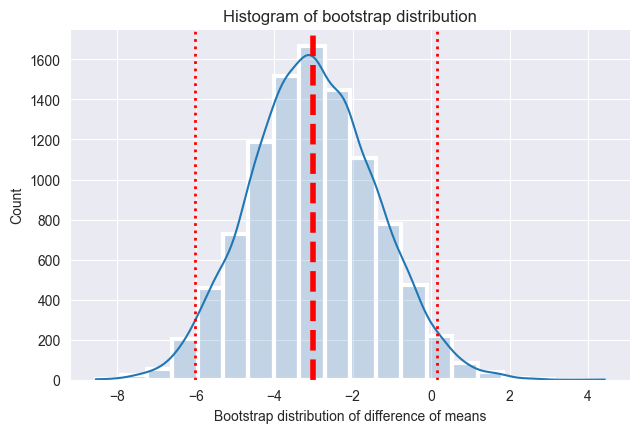

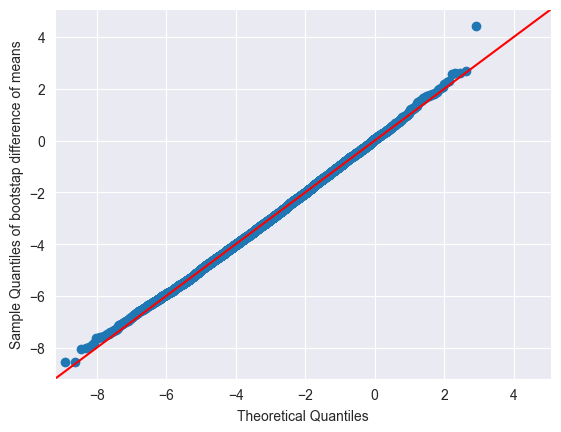

In [19]:
# Bootstrap the difference of means of low and mid SES students
def two_boot_two_stat(sample_1, sample_2, b, statistic_1, two_samp_statistic):
    two_boot_values = []
    n_samps_1 = len(sample_1)
    n_samps_2 = len(sample_2)
    for _ in range(b):  
      boot_estimate_1 = statistic_1(nr.choice(sample_1, size=n_samps_1, replace=True))
      boot_estimate_2 = statistic_1(nr.choice(sample_2, size=n_samps_2, replace=True))
      two_boot_values.append(two_samp_statistic(boot_estimate_1, boot_estimate_2))
    boot_estimate = np.mean(two_boot_values)
    print('Bootstrap point estimate = {:6.2f}'.format(boot_estimate))
    return(boot_estimate, np.array(two_boot_values))    

math_low_ses = test_scores.loc[test_scores.loc[:,'ses']==1,'math'] 
math_mid_ses = test_scores.loc[test_scores.loc[:,'ses']==2,'math']
bootstrap_diff_of_mean, boot_diffs = two_boot_two_stat(math_low_ses, math_mid_ses, 10000, np.mean, lambda x,y: x-y)

plot_hist_CI(boot_diffs, 'Bootstrap distribution of difference of means')
plot_QQ(boot_diffs)
plt.ylabel('Sample Quantiles of bootstap difference of means');

The bounds of the confidence interval have different signs, but only barely. In other words, we cannot quite have 95% confidence in rejecting the null hypothesis that this difference in treatments (different socioeconomic status) does not affect the student's test scores. Still, we do see that there does seem to be at least some effect. A larger sample size might well change our inference on this problem.     

> **Exercise 14-6:** One could well ask if there are significant differences in math scores for low and mid-socioeconomic status students and the high socioeconomic status students. To answer this question, repeat the process of computing the nonparametric bootstrap distribution of the difference of means of math scores between low and median socioeconomic status students and high socioeconomic status students. For each of these differences print the bootstrap difference of mean and confidence interval estimates. Then, plot a histogram of the bootstrap distribution showing the mean of the difference of means and the bounds of the confidence intervals as vertical lines. Make sure you print a header indicating which difference the results display.   

Bootstrap point estimate =  -4.96
At alpha = 0.05, lower and upper bootstrap confidence intervals =  -7.65    -2.27


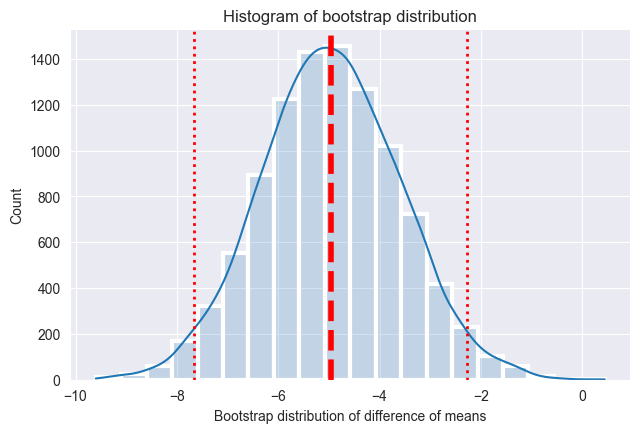

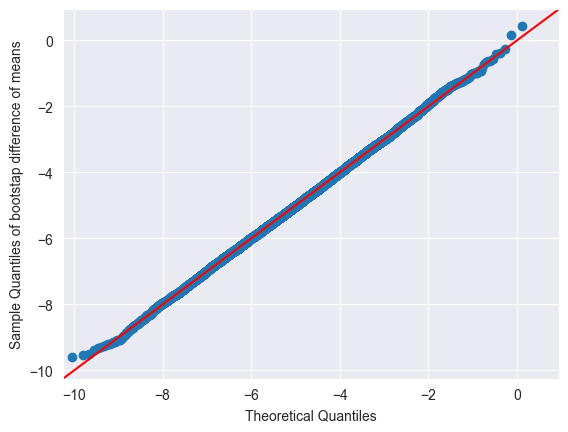

In [99]:
## Put your code below
math_low_mid_ses = test_scores.loc[test_scores.loc[:,'ses']<3,'math']
math_high_ses = test_scores.loc[test_scores.loc[:,'ses']==3,'math']
bootstrap_diff_of_mean, boot_diffs = two_boot_two_stat(math_low_mid_ses, math_high_ses, 10000, np.mean, lambda x,y: x-y)

plot_hist_CI(boot_diffs, 'Bootstrap distribution of difference of means')
plot_QQ(boot_diffs)
plt.ylabel('Sample Quantiles of bootstap difference of means');





> Can you reject the null hypothesis for these two cases that there is no significant difference in means for the math scores between the socioeconomic groups and why?  

> **Answer:** No, we cannot reject the null hypothesis because our confidence interval doesn't cross zero and our interval is most definitely showing a high likelihood of a negative difference of means that is significantly larger than zero.   

> **Exercise 14-7:** Given the small sample and the variation within the samples, one might consider using the difference of medians as a test statistic. However, there are significant mathematical challenges with performing classical inference on the difference of medians between two random variables. But perhaps, we can use nonparametric two-sample bootstrap methods to perform such inference. Since the median does not have continuous derivatives, strictly speaking, bootstrapping methods may not be suitable in some cases. Therefore, we proceed with caution.      
>     
> You will now compute the nonparametric bootstrap distribution of the difference of medians between low and mid-socioeconomic status students. Using this distribution, compute and print the mean of the difference of medians along with the bounds of the confidence interval. Then, plot a histogram of the bootstrap distribution showing the mean of the difference of medians and the bounds of the confidence intervals as vertical lines. Finally, display the Q-Q Normal plot of the bootstrapped estimates of the difference of medians.   

Bootstrap point estimate =  -5.45
At alpha = 0.05, lower and upper bootstrap confidence intervals =  -9.00    -2.00


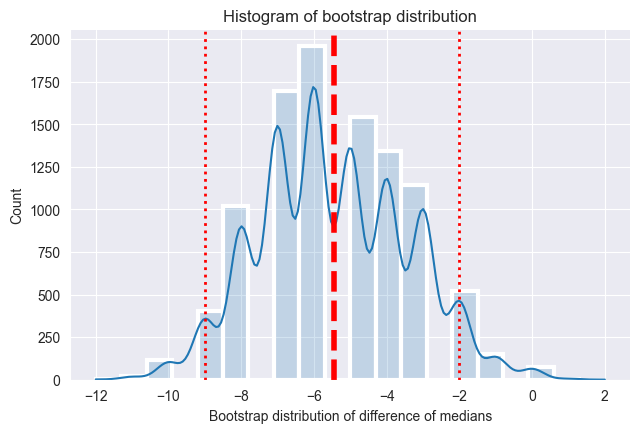

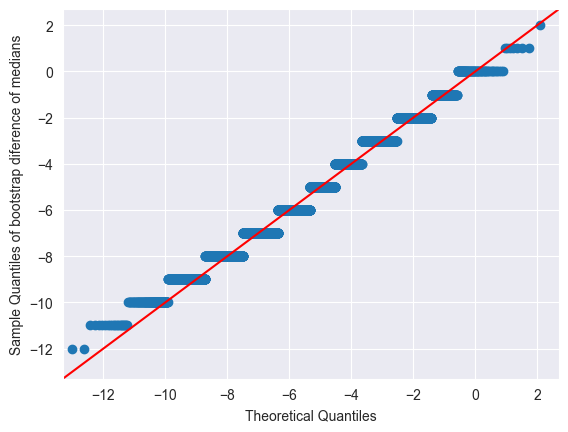

In [100]:
## Put your code below
bootstrap_diff_of_median, boot_diffs_median = two_boot_two_stat(math_low_ses, math_mid_ses, 10000, np.median, lambda x,y: x-y)

plot_hist_CI(boot_diffs_median, 'Bootstrap distribution of difference of medians')
plot_QQ(boot_diffs_median)
plt.ylabel('Sample Quantiles of bootstrap diference of medians');

> Answer the following questions:    
> 1. Can you reject the null hypothesis that there is no median difference in math scores between these two socioeconomic groups and why? 
> 2. How can you explain the results of the difference between the median test and the difference of the means test?  
> 3. Keeping in mind that the median does not have continuous derivatives, do the sample quantile values on the Q-Q Normal plot make sense and why?   

> **Answers:**  
> 1. Yes, based solely on this test one can reject the null hypothesis, since the confidence interval does not include 0.    
> 2. The median is more robust to outliers which accounts for the shift in the mean of the bootstrap median estimates compared to the mean of the bootstrap mean estimates.   
> 3. Because of the non-continuous nature of the median estimator, the Q-Q Normal plot exhibits stair-step behavior.   

#### Copyright 2020, 2021, 2022, 2023 Stephen F. Elston. All rights reserved.       